In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bbc_preprocessed_u.csv to bbc_preprocessed_u.csv


In [ ]:
import re
import nltk
import pandas as pd
from textblob import Word
import numpy as np
import csv
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras.layers import  Dropout, Dense
from sklearn import metrics

In [ ]:
#preprocessed dataset as input - text cleaned, stopwords removed, lemmatized
data = pd.read_csv('bbc_preprocessed_u.csv')
#Label encoding
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'category'. 
print(data['category'].unique())
data['category']= label_encoder.fit_transform(data['category']) 
data['category'].unique() 

['sport' 'business' 'tech' 'entertainment' 'politics']


array([3, 0, 4, 1, 2])

In [ ]:
x = data['text'].tolist()
y = data['category'].tolist()
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1000)

vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test  = vectorizer.transform(x_test)

In [ ]:

model = Sequential()
node = 512 # number of nodes
nLayers = 4 # number of  hidden layer
shape = X_train.shape[1] 
dropout = 0.5
nClasses = 5
model.add(Dense(node,input_dim=shape,activation='relu'))
model.add(Dropout(dropout))
for i in range(0,nLayers):
    model.add(Dense(node,input_dim=node,activation='relu'))
    model.add(Dropout(dropout))
model.add(Dense(nClasses, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


In [ ]:
#history = model.fit(X_train, Y_train, epochs=100, verbose=False, validation_data=(X_test, Y_test), batch_size=128)
history = model.fit(X_train, Y_train,
                          validation_data=(X_test, Y_test),
                          epochs=10,
                          batch_size=128,
                          verbose=2)

Train on 1056 samples, validate on 265 samples
Epoch 1/10
 - 2s - loss: 0.0473 - acc: 0.9792 - val_loss: 0.1382 - val_acc: 0.9736
Epoch 2/10
 - 2s - loss: 0.0338 - acc: 0.9915 - val_loss: 0.0928 - val_acc: 0.9811
Epoch 3/10
 - 2s - loss: 0.0260 - acc: 0.9924 - val_loss: 0.0919 - val_acc: 0.9811
Epoch 4/10
 - 2s - loss: 0.0332 - acc: 0.9924 - val_loss: 0.1532 - val_acc: 0.9774
Epoch 5/10
 - 2s - loss: 0.0131 - acc: 0.9934 - val_loss: 0.1613 - val_acc: 0.9774
Epoch 6/10
 - 2s - loss: 0.0074 - acc: 0.9981 - val_loss: 0.1011 - val_acc: 0.9811
Epoch 7/10
 - 2s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0404 - val_acc: 0.9811
Epoch 8/10
 - 2s - loss: 0.0038 - acc: 0.9991 - val_loss: 0.0732 - val_acc: 0.9811
Epoch 9/10
 - 2s - loss: 0.0071 - acc: 0.9991 - val_loss: 0.1214 - val_acc: 0.9811
Epoch 10/10
 - 2s - loss: 0.0042 - acc: 0.9991 - val_loss: 0.1480 - val_acc: 0.9774


In [ ]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
predictions = model.predict(X_test)
matrix = metrics.confusion_matrix(Y_test, predictions.argmax(axis=1))
print(matrix)

Training Accuracy: 1.0000
Testing Accuracy:  0.9774
[[100   0   0   0   0]
 [  2  17   0   0   1]
 [  1   0  21   0   0]
 [  0   0   0 105   0]
 [  2   0   0   0  16]]


In [ ]:
model.summary()
predicted = model.predict(X_test)
print(metrics.classification_report (Y_test, np.argmax(predicted, axis = 1)))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               8565248   
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)              

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

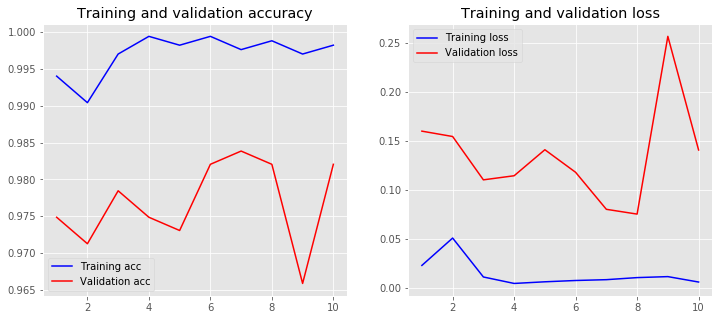

In [ ]:
plot_history(history)